## Parte 1

Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def to_chromatic_coordinates(img):
    # Convertir la imagen a espacio de color HSV para separar luminancia y crominancia
    img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    
    # Extraer los canales HSV
    h, s, v = cv.split(img_hsv)
    
    # Convertir el valor de intensidad (V) a tipo flotante para evitar problemas de precisión
    v_float = v.astype(np.float32)
    
    # Evitar divisiones por cero con un pequeño valor de bias
    v_float += 1e-6
    
    # Calcular las coordenadas cromáticas normalizando por la suma R+G+B
    img_float = img.astype(np.float32)
    sum_channels = np.sum(img_float, axis=2, keepdims=True) + 1e-6
    chromatic_img = img_float / sum_channels  # Obtener coordenadas cromáticas invariante a contraste
    
    # Combinar el canal de luminancia original con las coordenadas cromáticas
    chromatic_img_hsv = cv.merge((h, s, (chromatic_img[..., 2] * 255).astype(np.uint8)))
    
    # Convertir de regreso a RGB para visualización en Matplotlib
    img_rgb = cv.cvtColor(chromatic_img_hsv, cv.COLOR_HSV2RGB)
    
    return img_rgb



(-0.5, 907.5, 995.5, -0.5)

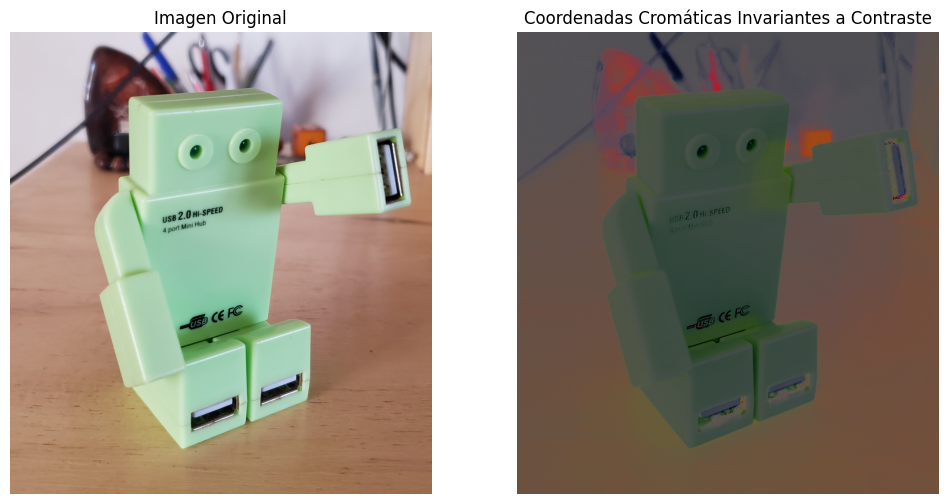

In [2]:
img = cv.imread('coord_cromaticas/CoordCrom_1.png') 
# Aplicar la transformación a coordenadas cromáticas
chromatic_img = to_chromatic_coordinates(img)
# Mostrar ambas imágenes: la original y la transformada
plt.figure(figsize=(12, 6))
# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Imagen en coordenadas cromáticas
plt.subplot(1, 2, 2)
plt.imshow(chromatic_img)
plt.title('Coordenadas Cromáticas Invariantes a Contraste')
plt.axis('off')

(-0.5, 907.5, 995.5, -0.5)

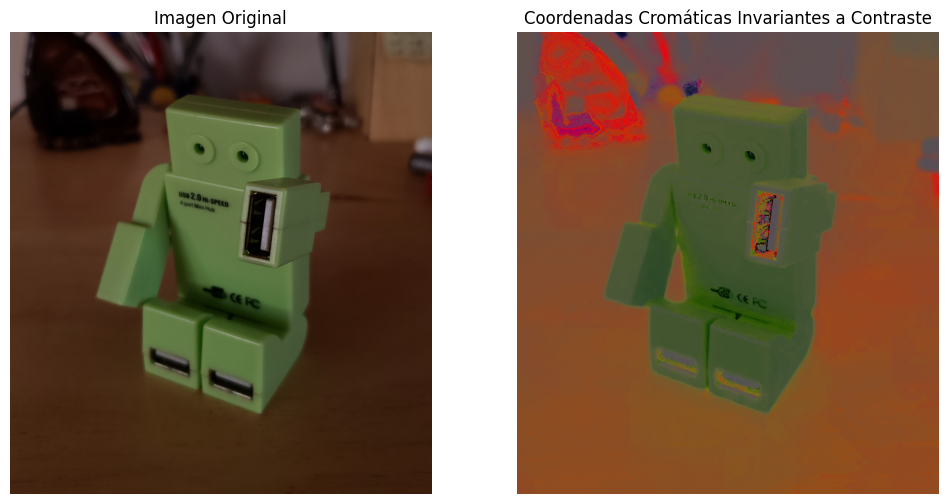

In [3]:
img = cv.imread('coord_cromaticas/CoordCrom_2.png') 
# Aplicar la transformación a coordenadas cromáticas
chromatic_img = to_chromatic_coordinates(img)
# Mostrar ambas imágenes: la original y la transformada
plt.figure(figsize=(12, 6))
# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Imagen en coordenadas cromáticas
plt.subplot(1, 2, 2)
plt.imshow(chromatic_img)
plt.title('Coordenadas Cromáticas Invariantes a Contraste')
plt.axis('off')

(-0.5, 907.5, 995.5, -0.5)

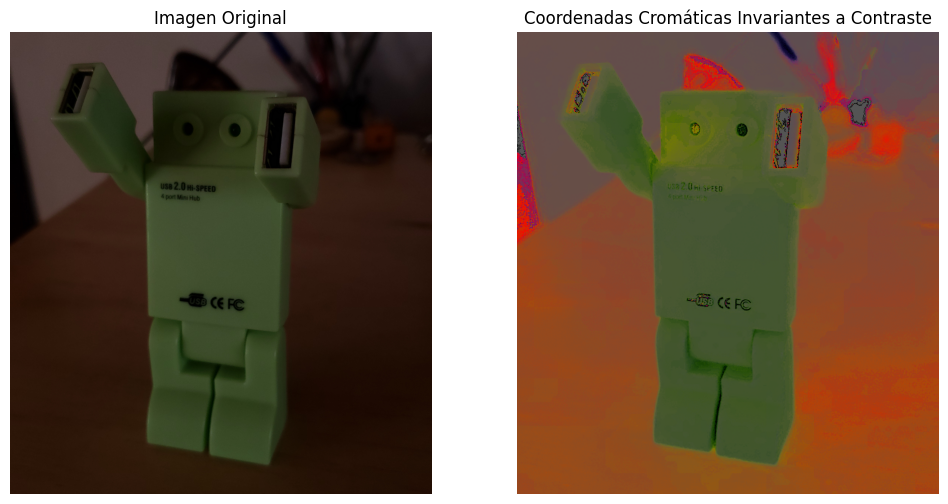

In [4]:
img = cv.imread('coord_cromaticas/CoordCrom_3.png') 
# Aplicar la transformación a coordenadas cromáticas
chromatic_img = to_chromatic_coordinates(img)
# Mostrar ambas imágenes: la original y la transformada
plt.figure(figsize=(12, 6))
# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Imagen en coordenadas cromáticas
plt.subplot(1, 2, 2)
plt.imshow(chromatic_img)
plt.title('Coordenadas Cromáticas Invariantes a Contraste')
plt.axis('off')

## Parte 2

Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [5]:
def white_patch_algorithm(image):
    # Convertir la imagen a tipo flotante para precisión
    img_float = image.astype(np.float32)

    # Separar los canales de color
    B, G, R = cv.split(img_float)

    # Calcular el valor máximo de cada canal
    max_r = np.max(R)
    max_g = np.max(G)
    max_b = np.max(B)

    # Asegurar que los valores máximos sean al menos 1 para evitar división por cero
    max_r = max(max_r, 1)
    max_g = max(max_g, 1)
    max_b = max(max_b, 1)

    # Calcular los factores de escala para normalizar al blanco (255, 255, 255)
    scale_r = 255.0 / max_r
    scale_g = 255.0 / max_g
    scale_b = 255.0 / max_b

    # Aplicar el ajuste de White Patch a cada canal
    R = R * scale_r
    G = G * scale_g
    B = B * scale_b

    # Combinar los canales y asegurarse de que los valores estén en el rango [0, 255]
    corrected_img = cv.merge([B, G, R])
    corrected_img = np.clip(corrected_img, 0, 255).astype(np.uint8)

    return corrected_img

(-0.5, 277.5, 99.5, -0.5)

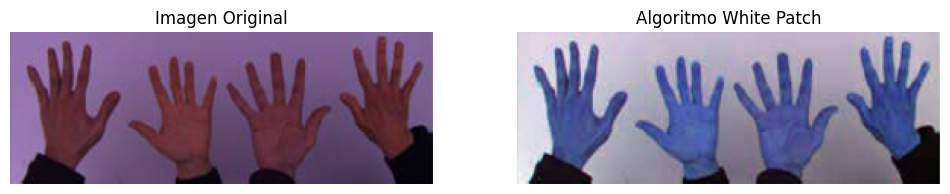

In [6]:
img = cv.imread('white_patch/test_blue.png') 
# Aplicar la transformación a coordenadas cromáticas
white_patch_img = white_patch_algorithm(img)
# Mostrar ambas imágenes: la original y la transformada
plt.figure(figsize=(12, 6))
# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Imagen en coordenadas cromáticas
plt.subplot(1, 2, 2)
plt.imshow(white_patch_img)
plt.title('Algoritmo White Patch')
plt.axis('off')

(-0.5, 277.5, 99.5, -0.5)

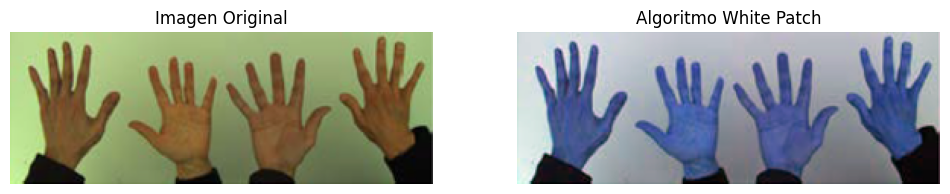

In [7]:
img = cv.imread('white_patch/test_green.png') 
# Aplicar la transformación a coordenadas cromáticas
white_patch_img = white_patch_algorithm(img)
# Mostrar ambas imágenes: la original y la transformada
plt.figure(figsize=(12, 6))
# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Imagen en coordenadas cromáticas
plt.subplot(1, 2, 2)
plt.imshow(white_patch_img)
plt.title('Algoritmo White Patch')
plt.axis('off')

(-0.5, 275.5, 98.5, -0.5)

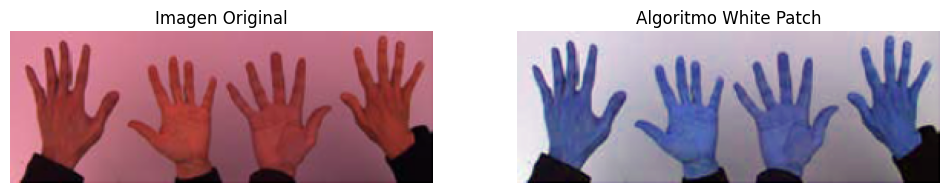

In [8]:
img = cv.imread('white_patch/test_red.png') 
# Aplicar la transformación a coordenadas cromáticas
white_patch_img = white_patch_algorithm(img)
# Mostrar ambas imágenes: la original y la transformada
plt.figure(figsize=(12, 6))
# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Imagen en coordenadas cromáticas
plt.subplot(1, 2, 2)
plt.imshow(white_patch_img)
plt.title('Algoritmo White Patch')
plt.axis('off')

(-0.5, 1199.5, 1599.5, -0.5)

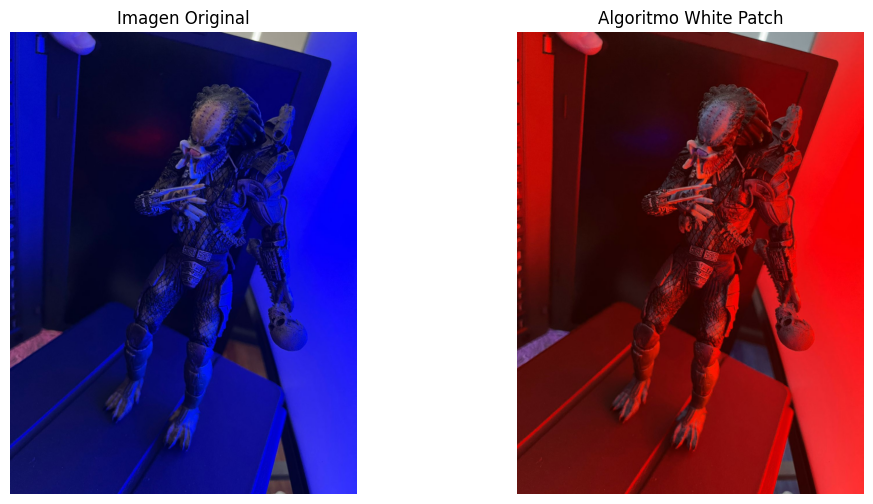

In [9]:
img = cv.imread('white_patch/wp_blue.jpg') 
# Aplicar la transformación a coordenadas cromáticas
white_patch_img = white_patch_algorithm(img)
# Mostrar ambas imágenes: la original y la transformada
plt.figure(figsize=(12, 6))
# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Imagen en coordenadas cromáticas
plt.subplot(1, 2, 2)
plt.imshow(white_patch_img)
plt.title('Algoritmo White Patch')
plt.axis('off')

(-0.5, 362.5, 570.5, -0.5)

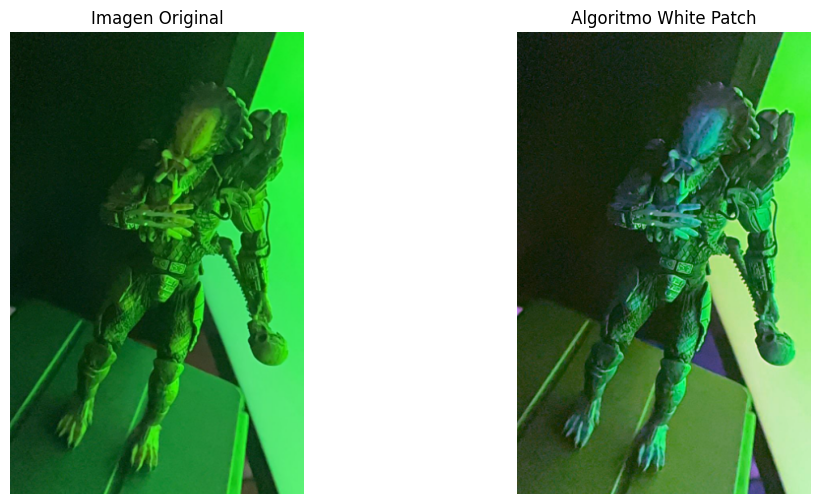

In [10]:
img = cv.imread('white_patch/wp_green.png') 
# Aplicar la transformación a coordenadas cromáticas
white_patch_img = white_patch_algorithm(img)
# Mostrar ambas imágenes: la original y la transformada
plt.figure(figsize=(12, 6))
# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Imagen en coordenadas cromáticas
plt.subplot(1, 2, 2)
plt.imshow(white_patch_img)
plt.title('Algoritmo White Patch')
plt.axis('off')

(-0.5, 1199.5, 1599.5, -0.5)

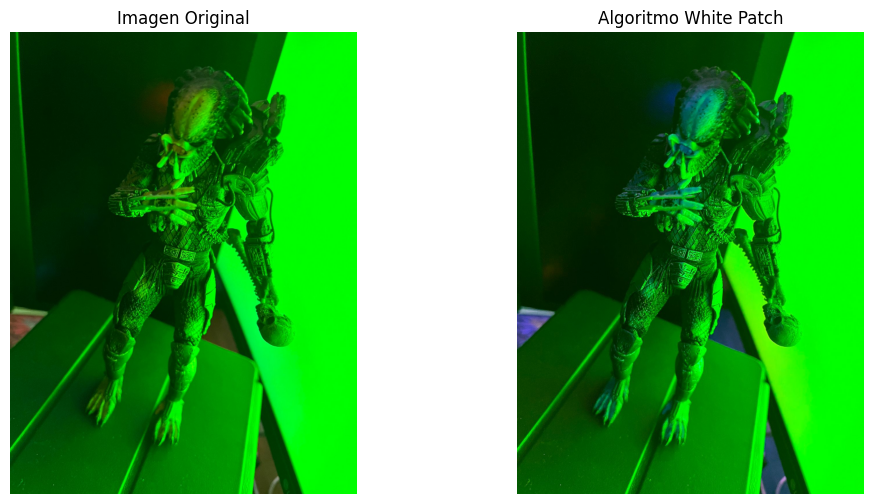

In [11]:
img = cv.imread('white_patch/wp_green2.jpg') 
# Aplicar la transformación a coordenadas cromáticas
white_patch_img = white_patch_algorithm(img)
# Mostrar ambas imágenes: la original y la transformada
plt.figure(figsize=(12, 6))
# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Imagen en coordenadas cromáticas
plt.subplot(1, 2, 2)
plt.imshow(white_patch_img)
plt.title('Algoritmo White Patch')
plt.axis('off')

(-0.5, 480.5, 812.5, -0.5)

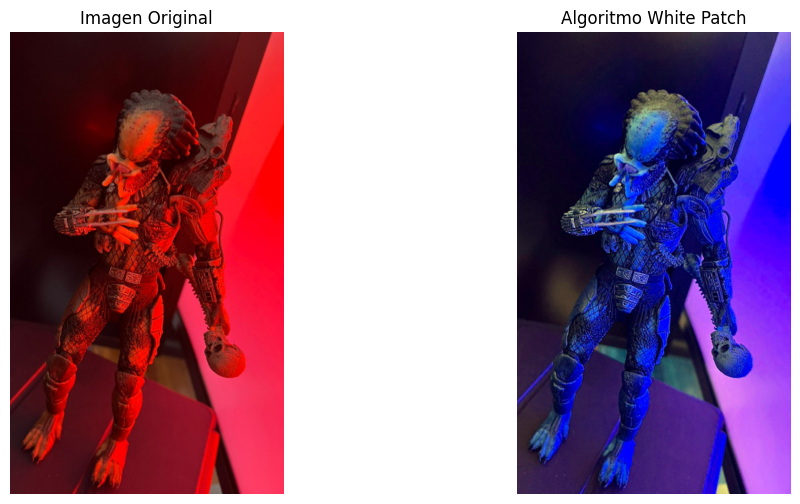

In [12]:
img = cv.imread('white_patch/wp_red.png') 
# Aplicar la transformación a coordenadas cromáticas
white_patch_img = white_patch_algorithm(img)
# Mostrar ambas imágenes: la original y la transformada
plt.figure(figsize=(12, 6))
# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Imagen en coordenadas cromáticas
plt.subplot(1, 2, 2)
plt.imshow(white_patch_img)
plt.title('Algoritmo White Patch')
plt.axis('off')

(-0.5, 1199.5, 1599.5, -0.5)

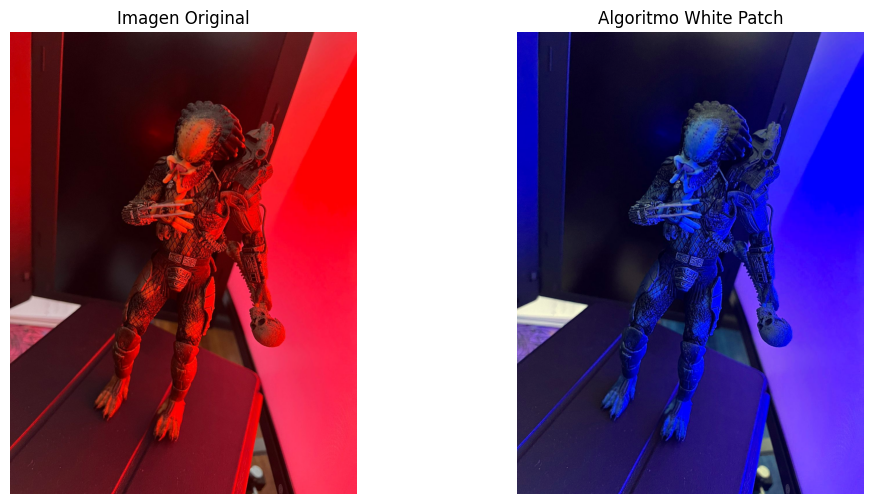

In [13]:
img = cv.imread('white_patch/wp_red2.jpg') 
# Aplicar la transformación a coordenadas cromáticas
white_patch_img = white_patch_algorithm(img)
# Mostrar ambas imágenes: la original y la transformada
plt.figure(figsize=(12, 6))
# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Imagen en coordenadas cromáticas
plt.subplot(1, 2, 2)
plt.imshow(white_patch_img)
plt.title('Algoritmo White Patch')
plt.axis('off')

### Análisis de Resultados y Posibles Fallas de White Patch:

Posibles Fallas: White Patch puede fallar si la imagen no contiene ninguna área verdaderamente blanca (que represente la iluminación). En estos casos, el algoritmo puede intensificar los colores de forma incorrecta o alterar los tonos.
Para mejorar, podrías considerar algoritmos avanzados como la normalización basada en histogramas o algoritmos de balance de blancos más sofisticados.

## Parte 2


Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

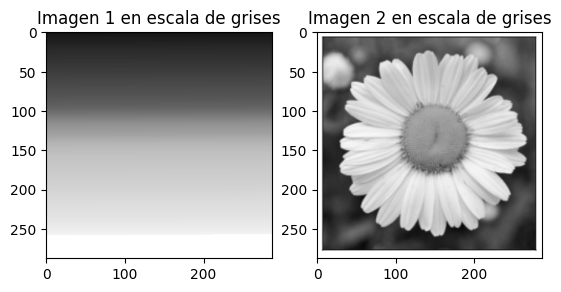

In [14]:
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Imagen 1 en escala de grises')
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Imagen 2 en escala de grises')
plt.show()


Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

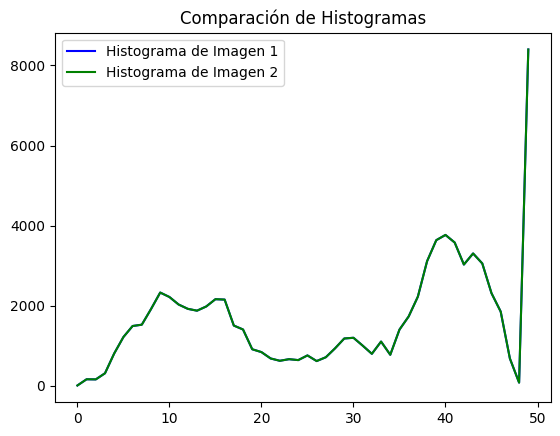

In [15]:
bins = 50
hist1 = cv.calcHist([img1], [0], None, [bins], [0, 256])
hist2 = cv.calcHist([img2], [0], None, [bins], [0, 256])

plt.figure()
plt.plot(hist1, color='blue', label='Histograma de Imagen 1')
plt.plot(hist2, color='green', label='Histograma de Imagen 2')
plt.title('Comparación de Histogramas')
plt.legend()
plt.show()


Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas.

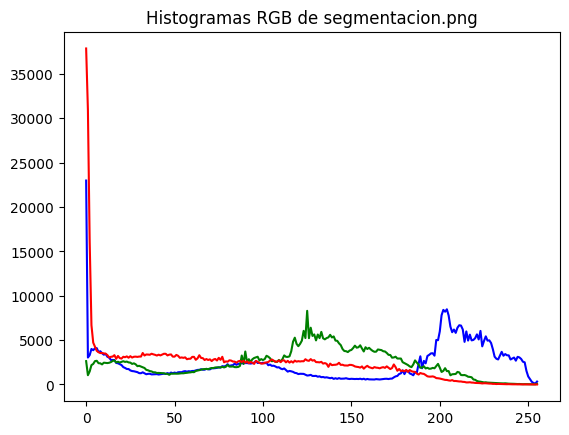

In [16]:
img_segment = cv.imread('segmentacion.png')
color = ('b', 'g', 'r')
plt.figure()
for i, col in enumerate(color):
    hist = cv.calcHist([img_segment], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title('Histogramas RGB de segmentacion.png')
plt.show()


Segmentación por Colores usando Máscaras:

    Segmentar el agua, cielo, y tierra, ajustando los valores RGB para crear máscaras específicas para cada componente. Como ejemplo:

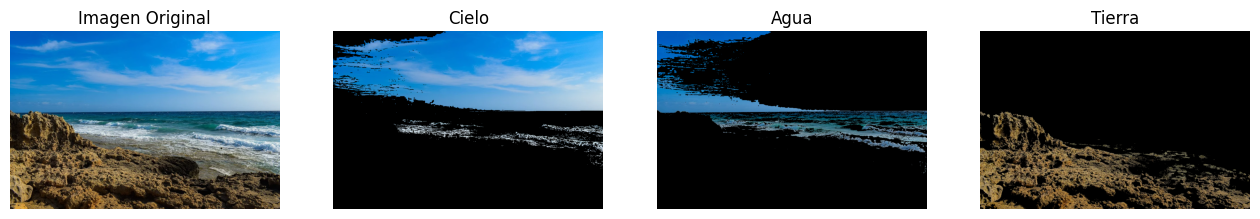

In [17]:
img_rgb = cv.cvtColor(img_segment, cv.COLOR_BGR2RGB)  # Convertir a RGB para visualización en Matplotlib
img_hsv = cv.cvtColor(img_segment, cv.COLOR_BGR2HSV)  # Convertir a HSV para segmentación

# Máscara para el cielo (azul claro en HSV)
lower_sky = np.array([90, 20, 200])  # Ajustado para capturar el cielo en el espacio HSV
upper_sky = np.array([130, 255, 255])
mask_sky = cv.inRange(img_hsv, lower_sky, upper_sky)
sky = cv.bitwise_and(img_rgb, img_rgb, mask=mask_sky)

# Máscara para el agua (azul oscuro en HSV)
lower_water = np.array([90, 50, 100])  # Valores ajustados para capturar el mar en HSV
upper_water = np.array([130, 255, 200])
mask_water = cv.inRange(img_hsv, lower_water, upper_water)
water = cv.bitwise_and(img_rgb, img_rgb, mask=mask_water)

# Máscara para la tierra (marrón en HSV)
lower_ground = np.array([10, 50, 50])  # Valores ajustados para tonos marrones
upper_ground = np.array([30, 255, 200])
mask_ground = cv.inRange(img_hsv, lower_ground, upper_ground)
ground = cv.bitwise_and(img_rgb, img_rgb, mask=mask_ground)

# Mostrar los resultados
plt.figure(figsize=(16, 8))

# Imagen original
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Segmentación del cielo
plt.subplot(1, 4, 2)
plt.imshow(sky)
plt.title('Cielo')
plt.axis('off')

# Segmentación del agua
plt.subplot(1, 4, 3)
plt.imshow(water)
plt.title('Agua')
plt.axis('off')

# Segmentación de la tierra
plt.subplot(1, 4, 4)
plt.imshow(ground)
plt.title('Tierra')
plt.axis('off')

plt.show()
